In [1]:
import collision_erosion_library as cel
from clausing import calculateClausingFactor, simpleClausingFactor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_parameters_from_clausing(clausing):
    C = clausing 
    ni = (-1.65*C + 2.228) * (1e17)
    no = (-5.281*C + 3.050) * (1e18)
    y  = (0.2562*C + 0.0203)
    Te = (1.6636*C + 6.3558)
    return ni, no, y, Te

def calculate_ab(a):
    b = 1/(a-1)
    print(b)
    return b

In [3]:
b = calculate_ab(0.5)

-2.0


In [4]:
j_bar = 1 
n0_sa = 2e18
double_ion_ratio = 0.08 #ufloat(0.08, 0.05)
lg     = 0.7e-3
rs     = 1.91/2
ra0    = 1.14/2
ts     = 0.38 # screen grid thickness, mm
ta     = 0.38 # accel grid thickness, mm
s      = 2.24 # aperture spacing, mm
Vd     = 1500
Va     = -190
M      = 2.18e-25 # kg, xenon particle mass
Ec     = 400 #ufloat(400, 200) # Energy at collision, using the average of the energy
E_cex  = 500 # Energy of CEX ions colliding with grid
M_grid = 95.95 # g/mol
rho_grid = 10.22 * (100)**3 # g/m3
t = np.linspace(0, 30)


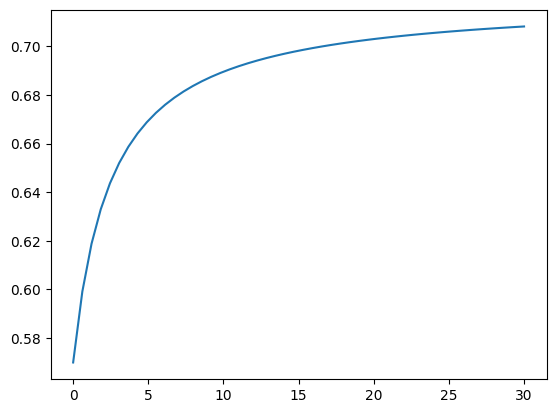

In [5]:
# Initial Clausing Factor
CF = simpleClausingFactor(ra0, s)
ni, n0, double_ion_ratio, Te = calculate_parameters_from_clausing(CF)

# Initial Parameters
hp0 = (j_bar, double_ion_ratio)
gg0 = (rs, ra0, lg, s)
gm0 = (M_grid, rho_grid)
mi0 = (n0, Ec, E_cex, Vd, Va, M)
ra_nom, _, _, _, _, _= cel.accel_radius_erosion_model(t, hp0, gg0, gm0, mi0)#, a = 0.563)
plt.plot(t, ra_nom)
plt.show()

In [ ]:

ra = np.zeros(len(t))
CF_arr = np.zeros(len(t))
CF_arr[0] = CF
ra[0] = ra0
y = double_ion_ratio
fig, axs = plt.subplots(2, 2, figsize=(12,8), sharex=True)
flat_axs = axs.flatten()
for i, ti in enumerate(t[:-1]):

    i+=1
    hp = (j_bar, y)
    #gg = (rs, ra0, lg, s)
    gg = (rs, ra[i-1], lg, s)
    gm = (M_grid, rho_grid)
    mi = (n0, Ec, E_cex, Vd, Va, M)
    #rai = cel.accel_radius_erosion_model(t[i], hp, gg, gm, mi, a = .563)
    ra[i], CF, ni, n0, y, Te = cel.accel_radius_erosion_model(t[i], hp, gg, gm, mi)#, a = 1/2, b=-2)
    #ra[i] = rai
    #CF = calculateClausingFactor(131.3, rs*2, ts, rai*2, ta, lg)
    CF = simpleClausingFactor(ra[i], s)
    CF_arr[i] = CF
    ni, n0, y, Te = calculate_parameters_from_clausing(CF)

    flat_axs[0].plot(ti, ni, 'r*')
    flat_axs[1].semilogy(ti, n0, 'r*')
    flat_axs[2].plot(ti, y, 'r*')
    flat_axs[3].plot(ti, Te, 'r*')

flat_axs[0].set_ylabel(r'Discharge Ion Density $[m^{-3}]$')
flat_axs[1].set_ylabel(r'Discharge Neutral Density $[m^{-3}]$')
flat_axs[2].set_ylabel(r'Double Ion Ration, $\gamma$')
flat_axs[3].set_ylabel(r'Discahrge Electron Temperature $[eV]$')

plt.show()

In [ ]:
CF_arr

In [ ]:
plt.plot(t, ra, label = 'with Clausing Factor')
plt.plot(t, ra_nom, label = 'without Clausing Factor')
#plt.ylim(0, 1.3)
plt.legend()

In [ ]:
ra